In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score
import math


In [2]:
train = pd.read_csv('diamonds_train.csv')
score = pd.read_csv('diamonds_score.csv')

In [4]:
score.head()

shape        cut color clarity  weight_ct fluorescence  length_width_ratio  \
0  Round      Ideal     G    VVS1       0.58    FaintInfo                1.01   
1  Round      Ideal     J     SI1       1.00     NoneInfo                1.01   
2  Round  Very Good     F    VVS2       0.90     NoneInfo                1.02   
3  Round      Ideal     H     VS1       0.30     NoneInfo                1.01   
4  Round  Very Good     I     VS2       1.51     NoneInfo                1.24   

      polish   symmetry                    girdle  cutlet  price  depth  \
0  Excellent  Excellent            Thin to Medium    None   2311   62.4   
1  Very Good  Very Good  Medium to Slightly Thick  Medium   3985   61.8   
2  Excellent  Very Good  Medium to Slightly Thick    None   5935   64.3   
3  Excellent  Very Good  Medium to Slightly Thick    None    578   62.2   
4  Excellent  Excellent   Slightly Thick to Thick    None   7195   69.4   

   table  length  width  height  
0     56    5.31   5.34    3.32  
1     61    6.35   6.40    3.94  
2     56    6.12   6.02    3.90  
3     56    4.30   4.26    2.66  
4     67    7.20   5.79    4.02

In [3]:
train.head()

shape        cut color clarity  weight_ct     fluorescence  \
0  Emerald  Very Good     D     SI1       1.70  Medium BlueInfo   
1    Round      Ideal     F      IF       1.07        FaintInfo   
2  Radiant  Very Good     G    VVS1       1.05         NoneInfo   
3    Round      Ideal     E    VVS2       2.85         NoneInfo   
4    Round      Ideal     D     SI1       0.35         NoneInfo   

   length_width_ratio     polish   symmetry                    girdle cutlet  \
0                1.29  Very Good  Very Good        Thin to Very Thick   None   
1                1.00  Excellent  Excellent    Thin to Slightly Thick   None   
2                1.20  Excellent  Excellent   Slightly Thick to Thick   None   
3                1.01  Excellent  Excellent  Medium to Slightly Thick   None   
4                1.00  Excellent  Excellent  Medium to Slightly Thick   None   

   price  depth  table  length  width  height  
0  13519   68.1   70.0    7.94   6.17    4.20  
1   8842   62.4   56.0    6.52   6.54    4.07  
2   4817   71.3   68.0    6.15   5.12    3.65  
3  63161   62.7   58.0    9.06   9.00    5.66  
4    653   59.9   59.0    4.57   4.59    2.74

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150546 entries, 0 to 150545
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   shape               150546 non-null  object 
 1   cut                 150546 non-null  object 
 2   color               150546 non-null  object 
 3   clarity             150546 non-null  object 
 4   weight_ct           150546 non-null  float64
 5   fluorescence        150546 non-null  object 
 6   length_width_ratio  150546 non-null  float64
 7   polish              150546 non-null  object 
 8   symmetry            150546 non-null  object 
 9   girdle              150546 non-null  object 
 10  cutlet              150546 non-null  object 
 11  price               150546 non-null  int64  
 12  depth               150546 non-null  float64
 13  table               150546 non-null  float64
 14  length              150546 non-null  float64
 15  width               150546 non-nul

<AxesSubplot:>

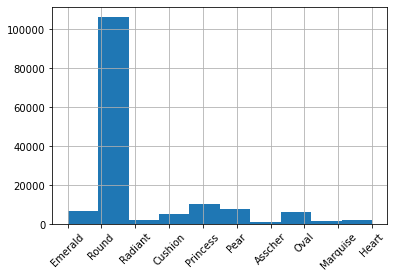

In [5]:
train['shape'].hist(xrot=45.0)

<AxesSubplot:>

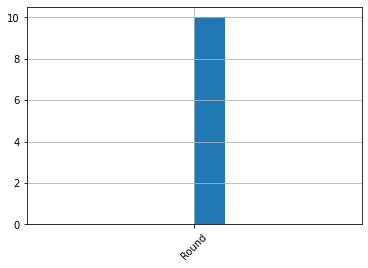

In [6]:
score['shape'].hist(xrot=45.0)

In [7]:
score.describe().T

count      mean          std     min       25%       50%  \
weight_ct            10.0     0.770     0.468117    0.30    0.3150     0.740   
length_width_ratio   10.0     1.035     0.072915    1.00    1.0100     1.010   
price                10.0  3715.400  3273.190397  483.00  530.0000  3148.000   
depth                10.0    64.070     2.829625   61.80   62.4250    62.600   
table                10.0    60.000     6.271629   56.00   56.2500    57.000   
length               10.0     5.551     1.261573    3.87    4.3350     5.715   
width                10.0     5.376     1.151233    3.72    4.3000     5.565   
height               10.0     3.441     0.708056    2.58    2.7325     3.610   

                          75%      max  
weight_ct              1.0450     1.51  
length_width_ratio     1.0175     1.24  
price               6527.5000  8942.00  
depth                 64.1750    69.40  
table                 60.2500    75.00  
length                 6.4775     7.20  
width                  6.3050     7.08  
height                 4.0000     4.44

In [8]:
round_diamonds = train[train['shape'].isin(['Round'])]

In [9]:
round_diamonds.describe().T

count         mean           std     min     25%  \
weight_ct           106261.0     0.742399      0.660936    0.23    0.37   
length_width_ratio  106261.0     1.006993      0.005141    1.00    1.00   
price               106261.0  5252.968671  22224.498325  282.00  710.00   
depth               106261.0    62.179249      1.521566    4.00   61.40   
table               106261.0    57.952478      2.052091    5.00   56.00   
length              106261.0     5.419384      1.184975    0.00    4.57   
width               106261.0     5.414422      1.187471    0.00    4.56   
height              106261.0     3.413124      0.759521    0.07    2.85   

                        50%      75%         max  
weight_ct              0.51     1.00       18.91  
length_width_ratio     1.01     1.01        1.04  
price               1387.00  4579.00  2641889.00  
depth                 62.30    62.80       67.80  
table                 58.00    59.00       69.00  
length                 5.13     6.21        9.99  
width                  5.12     6.22        9.99  
height                 3.19     3.92        9.80

In [10]:
small_round_diamonds = round_diamonds[round_diamonds['weight_ct']<2.5]

In [11]:
small_round_diamonds.describe().T

count         mean          std     min     25%  \
weight_ct           103474.0     0.665357     0.408362    0.23    0.37   
length_width_ratio  103474.0     1.006993     0.005148    1.00    1.00   
price               103474.0  3389.960348  5069.245541  282.00  697.00   
depth               103474.0    62.187928     1.526250    4.00   61.40   
table               103474.0    57.944665     2.054015    5.00   56.00   
length              103474.0     5.378811     1.006781    3.77    4.57   
width               103474.0     5.373572     1.010088    3.75    4.56   
height              103474.0     3.343923     0.631311    1.51    2.83   

                        50%      75%       max  
weight_ct              0.50     0.91      2.49  
length_width_ratio     1.01     1.01      1.04  
price               1351.00  4084.00  93344.00  
depth                 62.30    62.90     67.80  
table                 58.00    59.00     69.00  
length                 5.12     6.15      8.91  
width                  5.11     6.15      8.97  
height                 3.19     3.87      5.40

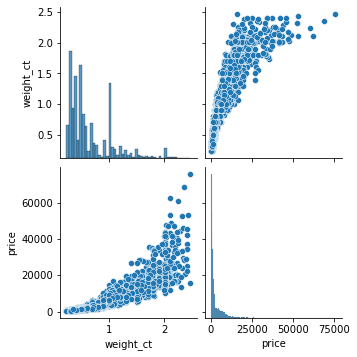

In [12]:
sns.pairplot(small_round_diamonds[['weight_ct','price']].sample(frac=.1))

In [13]:
train_score = small_round_diamonds.append(score, ignore_index=True)

In [14]:
train_score_transformed = pd.get_dummies(train_score, drop_first=True)

In [15]:
train_transformed = train_score_transformed.iloc[:-10,:]
score_transformed = train_score_transformed.iloc[-10:,:]


In [16]:
print('Train shape: ', train_transformed.shape)
print('Score shape: ', score_transformed.shape)

Train shape:  (103474, 108)
Score shape:  (10, 108)


In [17]:
X = train_transformed.drop(['price'], axis=1)
y = train_transformed['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [18]:
diamond_price_model = LinearRegression()

In [19]:
diamond_price_model.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred = diamond_price_model.predict(X_test)

In [22]:
y_pred

array([-468.99757494, 3297.51897502,  325.26414631, ..., 1944.35902648,
       1812.59623117, 1705.95119683])

In [108]:
print('Regression model performance evaluation')
print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Max error: ', max_error(y_test, y_pred))

Regression model performance evaluation
R2:  0.8764524296505681
MAE:  877.4066368844816
RMSE:  1745.0999213751807
Max error:  64556.311950280506


In [112]:
y_score = diamond_price_model.predict(score_transformed.drop(['price'], axis=1))

results = score_transformed.copy()
results['predicted_price'] = y_score

results['assessment'] = np.where(results['price'] > results['predicted_price'], 'undervalued', 'overvalued')


In [113]:
results[['price','predicted_price','assessment']]

price  predicted_price   assessment
103474   2311      2741.213287   overvalued
103475   3985      4238.990145   overvalued
103476   5935      5165.555347  undervalued
103477    578       488.315822  undervalued
103478   7195     23258.853118   overvalued
103479   8942     11515.077865   overvalued
103480    486      5162.774245   overvalued
103481    483       232.310527  undervalued
103482    514       343.996395  undervalued
103483   6725      6831.289734   overvalued